# Capítulo 5: Conjuntos

Colección de elementos no ordenados y no indexados.

In [1]:
x = {}
type(x)

dict

In [2]:
x = {1,2,3}
type(x)

set

In [3]:
x = set((1,2,3))

In [4]:
print(x)

{1, 2, 3}


In [5]:
print(1 in x)

True


In [6]:
x.add(4)

In [7]:
print(x)

{1, 2, 3, 4}


In [8]:
x.update({5,6,7})

In [9]:
print(x)

{1, 2, 3, 4, 5, 6, 7}


In [10]:
x.update({1,4,6})

In [11]:
print(x)

{1, 2, 3, 4, 5, 6, 7}


In [12]:
len(x)

7

In [13]:
x.remove(4)

In [14]:
print(x)

{1, 2, 3, 5, 6, 7}


In [15]:
x.discard(3)

In [16]:
print(x)

{1, 2, 5, 6, 7}


In [17]:
x.pop()

1

In [18]:
print(x)

{2, 5, 6, 7}


In [19]:
aux = x.copy()
print(aux)

{2, 5, 6, 7}


In [20]:
x.clear()

In [21]:
print(x)

set()


In [22]:
x = aux
del x
print(x)

NameError: name 'x' is not defined

In [23]:
x = aux
y = {1,3,4}
x.union(y)

{1, 2, 3, 4, 5, 6, 7}

In [25]:
x

{2, 5, 6, 7}

In [24]:
x | y

{1, 2, 3, 4, 5, 6, 7}

In [26]:
x.intersection(y)

set()

In [27]:
x & y

set()

In [28]:
x.difference(y)

{2, 5, 6, 7}

In [29]:
x - y

{2, 5, 6, 7}

In [30]:
x2 = {1,3,4}
y2 = {1,2,3}
x2.difference_update(y2)

In [31]:
print(x2)

{4}


In [32]:
x2 = {1,3,4}
y2 = {1,2,3}
x2.intersection_update(y2)

In [33]:
print(x2)

{1, 3}


In [34]:
x2 = {1,3,4}
y2 = {1,2,3}
x2.isdisjoint(y2)

False

In [35]:
x.isdisjoint(y)

True

In [36]:
x.issubset(y)

False

In [37]:
{1}.issubset(y2)

True

In [38]:
x2.issuperset({1})

True

$$
A \Delta B = (A \cup B) \setminus (A \cap B) = (A \setminus B) \cup (B \setminus A)
$$

In [39]:
x.symmetric_difference(y)

{1, 2, 3, 4, 5, 6, 7}

In [40]:
x2.symmetric_difference_update(y2)

In [41]:
print(x2)

{2, 4}


**Ejercicio:**

Generar 2 conjuntos con 10 numeros aleatorios enteros entre 0 y 100.
Calcule su unión, intersección y diferencia.

In [42]:
# Crear los conjuntos
import numpy as np
aux = np.random.randint(100,size=(10,10))
x = set(aux[0])
y = set(aux[1])

In [43]:
# Calcular la union, interseccion y diferencia
union = x | y
inter = x & y
dife = x - y

In [44]:
# visualizar los resultados
print('Union: {} \nIntersección: {} \nDiferencia: {}'.format(union,inter,dife))

Union: {11, 76, 16, 17, 18, 19, 20, 21, 91, 93, 30, 96, 36, 40, 47, 49, 57, 62} 
Intersección: {40} 
Diferencia: {11, 16, 49, 19, 21, 57, 91, 62}


# Capítulo 6. Implementación de modelos de programación lineal

Existen otros Paquetes que se pueden usar para la resolución de modelos. Los más comunes, dependiendo del tipo de modelo son: 

- CVXOpt
- PuLP
- OpenOpt
- Pyomo-Coopr
- **Xpress**

En esta ocación procederemos a implementar y resolver modelos lineales con el paquete **Pyomo**.

## Pyomo:

Pyomo es un paquete desarrollado por Coopr. Es de uso libre y se puede adaptar a diferentes solvers, tanto de uso gratuito como pagados.

## Instalación:

Para la instalación podemos ejecutar el comando `pip install pyomo`. En algunos casos podría dar un error de compilación debido a la falta de dependencias. Uno puede chequearlas usando `pip list`. Sin embargo, Anaconda nos instala todas estas dependencias en su paquete por defecto.

In [45]:
pip list

Package                            Version
---------------------------------- -----------------
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 1.9.12
anaconda-project                   0.8.3
apply                              1.5
argh                               0.26.2
asn1crypto                         1.3.0
astroid                            2.3.3
astropy                            4.0
atomicwrites                       1.3.0
attrs                              19.3.0
autopep8                           1.4.4
Babel                              2.8.0
backcall                           0.1.0
backports.functools-lru-cache      1.6.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
bandmat                            0.8.dev1
bcrypt                             3.1.7
beautifulsoup4                     4.8.2
bitarray                           1.2

In [ ]:
pip install pyomo

### Solver:
A diferencia de los paquetes usuales como PySCIPOpt, la instalación de los solvers los realizaremos de manera manual. En especial si el solver requiere una licencia. Existen algunos solvers de uso gratuito. En esta ocación utilizaremos como solver **GLPK**. Dependiendo del sistema operativo uno puede hacer uso del solver usando el comando `pip install glpk`.

Los solvers más comunes para resolución AMPL son:

- CPLEX
- GUROBI
- XPRESS
- CONOPT
- KNITRO
- LOQO
- MINOS
- SNOPT
- BARON
- LGO
- LINDO GLOBAL

In [46]:
import pyomo
help(pyomo)

Help on package pyomo:

NAME
    pyomo

DESCRIPTION
    #  ___________________________________________________________________________
    #
    #  Pyomo: Python Optimization Modeling Objects
    #  Copyright 2017 National Technology and Engineering Solutions of Sandia, LLC
    #  Under the terms of Contract DE-NA0003525 with National Technology and 
    #  Engineering Solutions of Sandia, LLC, the U.S. Government retains certain 
    #  rights in this software.
    #  This software is distributed under the 3-clause BSD License.
    #  ___________________________________________________________________________

PACKAGE CONTENTS
    bilevel (package)
    checker (package)
    common (package)
    contrib (package)
    core (package)
    dae (package)
    dataportal (package)
    duality (package)
    environ (package)
    gdp (package)
    kernel (package)
    mpec (package)
    neos (package)
    network (package)
    opt (package)
    pysp (package)
    repn (package)
    scripting (p

In [47]:
import pyomo.environ
help(pyomo.environ)

Help on package pyomo.environ in pyomo:

NAME
    pyomo.environ

DESCRIPTION
    #  ___________________________________________________________________________
    #
    #  Pyomo: Python Optimization Modeling Objects
    #  Copyright 2017 National Technology and Engineering Solutions of Sandia, LLC
    #  Under the terms of Contract DE-NA0003525 with National Technology and
    #  Engineering Solutions of Sandia, LLC, the U.S. Government retains certain
    #  rights in this software.
    #  This software is distributed under the 3-clause BSD License.
    #  ___________________________________________________________________________

PACKAGE CONTENTS
    tests (package)

DATA
    Any = <pyomo.core.base.set.DeclareGlobalSet.<locals>.GlobalSet object>
    AnyWithNone = <pyomo.core.base.set.DeclareGlobalSet.<locals>.GlobalSet...
    Binary = <pyomo.core.base.set.DeclareGlobalSet.<locals>.GlobalSet obje...
    Boolean = <pyomo.core.base.set.DeclareGlobalSet.<locals>.GlobalSet obj...
    Em

In [48]:
dir(pyomo.environ)

['AbstractModel',
 'AlphaNumericTextLabeler',
 'Any',
 'AnyWithNone',
 'Binary',
 'Block',
 'Boolean',
 'BooleanConstant',
 'BooleanSet',
 'BooleanValue',
 'BooleanVar',
 'BooleanVarList',
 'BuildAction',
 'BuildCheck',
 'CNameLabeler',
 'Component',
 'ComponentMap',
 'ComponentUID',
 'ConcreteModel',
 'Connector',
 'Constraint',
 'ConstraintList',
 'CounterLabeler',
 'CuidLabeler',
 'DataPortal',
 'EmptySet',
 'Expr_if',
 'Expression',
 'ExpressionFactory',
 'ExpressionRegistration',
 'ExternalFunction',
 'IParamRepresentation',
 'IPyomoExpression',
 'IPyomoPresolveAction',
 'IPyomoPresolver',
 'IPyomoScriptCreateDataPortal',
 'IPyomoScriptCreateModel',
 'IPyomoScriptModifyInstance',
 'IPyomoScriptPostprocess',
 'IPyomoScriptPreprocess',
 'IPyomoScriptPrintInstance',
 'IPyomoScriptPrintModel',
 'IPyomoScriptPrintResults',
 'IPyomoScriptSaveInstance',
 'IPyomoScriptSaveResults',
 'IntegerInterval',
 'IntegerSet',
 'Integers',
 'LogicalConstraint',
 'LogicalConstraintList',
 'Model',
 '

In [49]:
help(pyomo.environ.ConcreteModel)

Help on class ConcreteModel in module pyomo.core.base.PyomoModel:

class ConcreteModel(Model)
 |  ConcreteModel(*args, **kwds)
 |  
 |  A concrete optimization model that does not defer construction of
 |  components.
 |  
 |  Method resolution order:
 |      ConcreteModel
 |      Model
 |      pyomo.core.base.block.SimpleBlock
 |      pyomo.core.base.block._BlockData
 |      pyomo.core.base.component.ActiveComponentData
 |      pyomo.core.base.component.ComponentData
 |      pyomo.core.base.block.Block
 |      pyomo.core.base.indexed_component.ActiveIndexedComponent
 |      pyomo.core.base.indexed_component.IndexedComponent
 |      pyomo.core.base.component.ActiveComponent
 |      pyomo.core.base.component.Component
 |      pyomo.core.base.component._ComponentBase
 |      pyomo.core.pyomoobject.PyomoObject
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, *args, **kwds)
 |      Constructor
 |  
 |  ----------------------------------------------------------

In [50]:
help(pyomo.environ.Var)

Help on class Var in module pyomo.core.base.var:

class Var(pyomo.core.base.indexed_component.IndexedComponent)
 |  Var(*args, **kwds)
 |  
 |  A numeric variable, which may be defined over an index.
 |  
 |  Args:
 |      domain (Set or function, optional): A Set that defines valid
 |          values for the variable (e.g., `Reals`, `NonNegativeReals`,
 |          `Binary`), or a rule that returns Sets.  Defaults to `Reals`.
 |      within (Set or function, optional): An alias for `domain`.
 |      bounds (tuple or function, optional): A tuple of (lower, upper)
 |          bounds for the variable, or a rule that returns tuples.
 |          Defaults to (None, None).
 |      initialize (float or function, optional): The initial value for
 |          the variable, or a rule that returns initial values.
 |      rule (float or function, optional): An alias for `initialize`.
 |      dense (bool, optional): Instantiate all elements from
 |          `index_set()` when constructing the Var (Tr

## Qué es un modelo matemático...???

Transcribir un problema del lenguaje cotidiano al lenguaje matemático.

### Qué es un modelo de optimización ...???

Existen diferentes tipos de problemas, y por lo tanto, diferentes modelos matemáticos. En este curso nos interesan los modelos de optimización lineal entera.

<div>
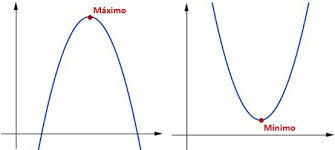
</div>

**Ejemplo:**
Intentar encontrar la solución óptima del siguiente problema:

$$
\begin{align*}
    \min x + y \\
    x + 2y \geq 5\\
    4x + y \geq 6
\end{align*}
$$

Pudiste encontrar la solución... ??? 

Igualamos los sistemas
$$
\left\{ \begin{array}{l}
x = 5 - 2y \\
4x + y = 6
\end{array} \right.
$$
Resolvemos el sistema lineal
$$
6 = 4(5-2y) + y = 20 - 7 y
$$
equivalentemente,
$$
y = 14/7 = 2 \quad \Longrightarrow \quad x = 5 - 2(2) = 1.
$$
Por lo tanto, la solución del problema es: $x+y = 1 + 2 = 3$.

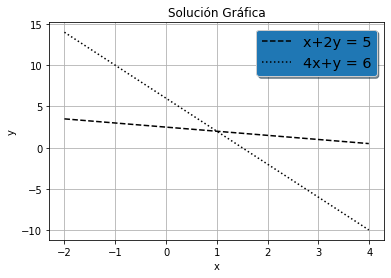

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Make some fake data.
x1 = np.arange(-2.0, 4.0, 0.01)
y1 = (5 - x1)/2

x2 = np.arange(-2.0, 4.0, 0.01)
y2 = 6 - 4*x2

# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(x1, y1, 'k--', label='x+2y = 5')
ax.plot(x2, y2, 'k:', label='4x+y = 6')
ax.grid()
ax.set(xlabel='x', ylabel='y',
       title='Solución Gráfica')

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C0')

plt.show()

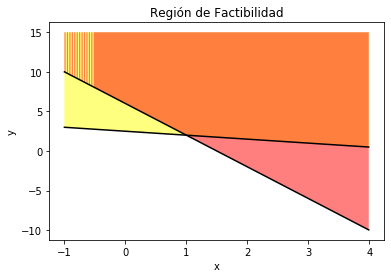

In [52]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-1.0, 4.0, 0.01)
y1 = (5 - x)/2
y2 = 6 - 4*x

fig, ax = plt.subplots()
ax.plot(x, y1, x, y2, color='black')

ax.fill_between(x, y1, 15, where=(x + 2*y1 >= 5), facecolor='yellow', alpha=0.5)
ax.fill_between(x, y2, 15, where=(4*x + y2 >= 6), facecolor='red', alpha=0.5)

ax.set(xlabel='x', ylabel='y', title='Región de Factibilidad')

plt.show()

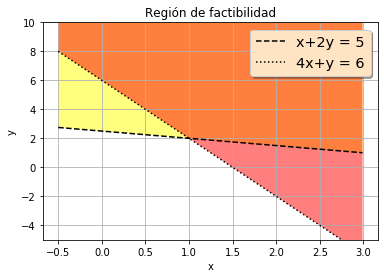

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Make some fake data.
x = np.arange(-0.5, 3.0, 0.01)
y1 = (5 - x)/2
y2 = 6 - 4*x

# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(x, y1, 'k--', label='x+2y = 5')
ax.plot(x, y2, 'k:', label='4x+y = 6')
ax.grid()
ax.set(xlabel='x', ylabel='y',
       title='Región de factibilidad')

ax.fill_between(x, y1, 10, where=(x + 2*y1 >= 5), facecolor='yellow', alpha=0.5)
ax.fill_between(x, y2, 10, where=(4*x + y2 >= 6), facecolor='red', alpha=0.5)

ax.set_ylim((-5, 10))
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('bisque')

plt.show()

Al problema anterior se le conoce como un problema de programación lineal entera debido a que sus restricciones son solo desigualdades o ecuaciones lineales. Y se dice de optimización, pues su función objetivo consiste en minimizar o maximizar una función, se desea que esta sea lineal, pero existen problemas para los cuales no es posible dicha formulación. En este curso nos enfocaremos en problemas de optimización lineal entera o mejor conocidos como problemas ILP o simplemente IP. En general se los conoce como problemas LP (linear programming) si sus restricciones son lineales.

La forma canónica de un problema LP es:

$$
\begin{align*}
    \min c^T x \\
    \mathrm{s.r.}\\
    Ax \leq b \\
    x \geq 0
\end{align*}
$$

__Nota:__ Sin pérdida de generalidad uno puede asumir siempre un problema de minimización. Sin embargo, en ocaciones es preferible resolver el problema de maximización.

Uno puede clasificar los modelos en dos tipos: modelos concretos y modelos abstractos.

__Modelos Concretos:__ Decimos que es concreto si es un problema para un caso particular. Por ejemplo el Problema:
$$
\begin{align*}
    \min x + y \\
    x + 2y \geq 5\\
    4x + y \geq 6
\end{align*}
$$
Es un modelo concreto. No hay parámetros generales.

__Modelos Abstractos:__ Estos son modelos más generales, uno debe definir variables, parámetros, conjuntos, desigualdades, etc. Por ejemplo si escribimos un modelo en su forma canónica, asignando ciertas características a las desigualdades y a las regiones de factibilidad, uno tendría un modelo abstracto. También se los conoce como problemas de la literatura. Por ejemplo, el problema de horarios para universidades tiene un modelo abstracto. Sin embargo, si nosotros aplicamos este modelo a un caso particular de la EPN. Es decir, si solo lo vamos a usar una sola vez para un conjunto de parámetros específicos dejaría de ser un modelo abstracto y se convertiría en concreto.

### Deber (Conjuntos):

1. Crear dos conjuntos con 10 números aleatorios enteros.
2. Encontrar la unión, intersección, diferencia, diferencia simétrica y verificar si son subconjuntos.
3. Crear un diccionario con los resultados en el literal anterior y presentar los resultados como una tabla.